# DS_C5_S5

# Task 1: Data Cleaning
Perform the necessary data cleaning steps to convert messy, unclean data into clean data.

In [2]:
import pandas as pd
df = pd.read_csv('DS1_C5_S5_Hotel Dataset.csv')

num_col = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_col = df.select_dtypes(include=['object']).columns.tolist()

# Step 1: Handling Missing Values
for col in num_col:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())
for col in cat_col:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# Step 2: Remove Duplicate Rows
df.drop_duplicates(inplace=True)

# Summary of cleaning steps completed
print(f"Numerical Columns: {num_col}\n")
print(f"Categorical Columns: {cat_col}\n")
print("Remaining Missing Values:", df.isnull().sum().sum())
print("Shape after removing duplicates:", df.shape)

# Display the cleaned dataset's first few rows
df.head()

Numerical Columns: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

Categorical Columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']

Remaining Missing Values: 0
Shape after removing duplicates: (1875, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,234.0,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,234.0,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,234.0,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,234.0,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,234.0,0,Transient,117.81,1,2,Check-Out,10-07-2015


# Task 2: Booking Pattern Analysis
- What are the peak booking periods for the hotel?
- Is there a relationship between lead time and the likehood of a booking being cancelled?
- How do booking pattern vary by month, week, and a day of the week?


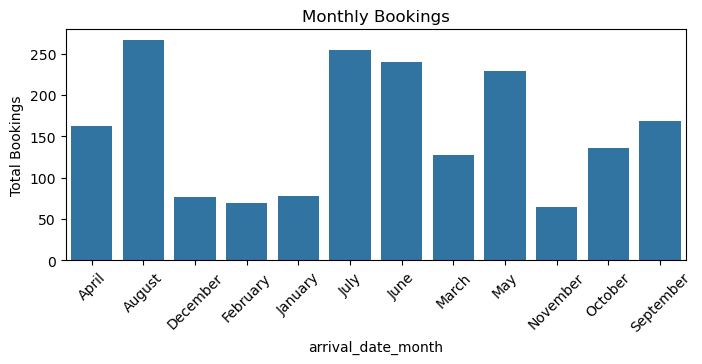

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly booking patterns
monthly_bookings = df.groupby('arrival_date_month', observed=True)['hotel'].count().reset_index(name='total_bookings')

plt.figure(figsize=(8, 3))
sns.barplot(x='arrival_date_month', y='total_bookings', data=monthly_bookings)
plt.title('Monthly Bookings')
plt.xticks(rotation=45)
plt.ylabel('Total Bookings')
plt.show()

arrival_date_weekday
Monday       274
Tuesday      213
Wednesday    247
Thursday     264
Friday       281
Saturday     312
Sunday       284
Name: hotel, dtype: int64


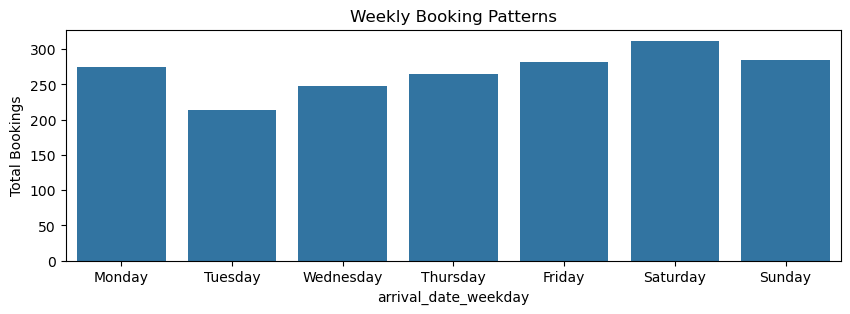

In [28]:
# Group by day of the week and count bookings
weekly_bookings = df.groupby('arrival_date_weekday')['hotel'].count().reindex(['Monday', 'Tuesday', 'Wednesday', 
                                                                              'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)
print(weekly_bookings)

plt.figure(figsize=(10, 3))
sns.barplot(x=weekly_bookings.index, y=weekly_bookings.values)
plt.title('Weekly Booking Patterns')
plt.ylabel('Total Bookings')
plt.show()

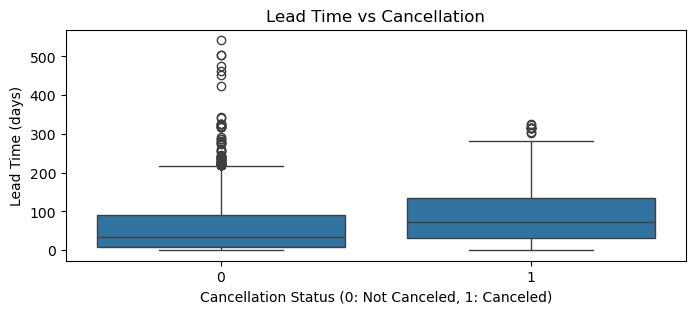

In [14]:
# Correlation analysis
correlation = df[['lead_time', 'is_canceled']].corr()

plt.figure(figsize=(8, 3))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time vs Cancellation')
plt.xlabel('Cancellation Status (0: Not Canceled, 1: Canceled)')
plt.ylabel('Lead Time (days)')
plt.show()

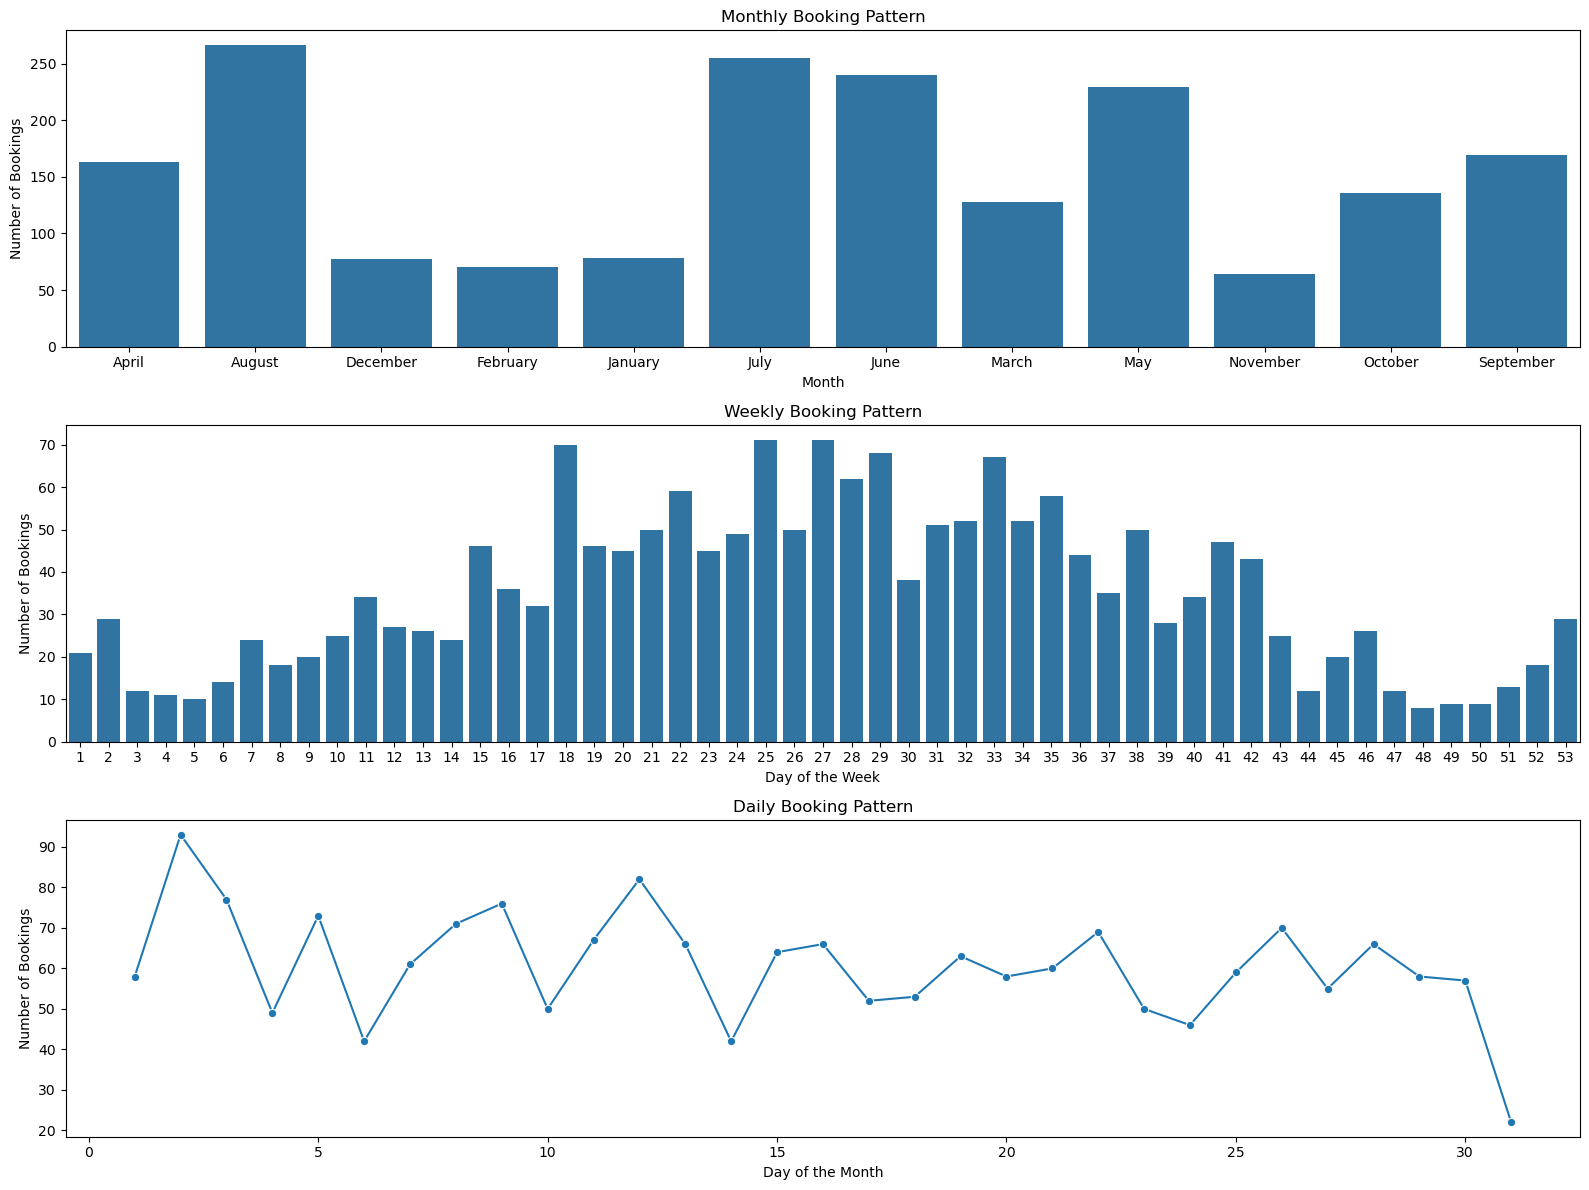

In [13]:
# Monthly booking pattern
monthly_bookings_pattern = df.groupby('arrival_date_month').size().reset_index(name='booking_count')

# Weekly pattern
weekly_bookings_pattern = df.groupby('arrival_date_week_number').size().reset_index(name='booking_count')

# Daily pattern (day of the month)
daily_bookings_pattern = df.groupby('arrival_date_day_of_month').size().reset_index(name='booking_count')
plt.figure(figsize=(16, 12))

# Monthly Plot
plt.subplot(3, 1, 1)
sns.barplot(x='arrival_date_month', y='booking_count', data=monthly_bookings_pattern)
plt.title('Monthly Booking Pattern')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')

# Weekly Plot
plt.subplot(3, 1, 2)
sns.barplot(x='arrival_date_week_number', y='booking_count', data=weekly_bookings_pattern)
plt.title('Weekly Booking Pattern')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bookings')

# Daily Plot
plt.subplot(3, 1, 3)
sns.lineplot(x='arrival_date_day_of_month', y='booking_count', data=daily_bookings_pattern, marker='o')
plt.title('Daily Booking Pattern')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

# Interpretation Task 2: Booking Pattern Analysis
Peak Booking Periods:
- By grouping bookings by month (using arrival_date_month), you would observe which months had the highest number of bookings. For example, if July and August show significantly higher booking counts, it may indicate peak tourist seasons or holidays.
- Analyzing the relationship between lead_time (the number of days between booking and arrival) and cancellation (is_canceled), you might find that longer lead times correlate with higher cancellation rates. For example, bookings made 60 days in advance could be more likely to be canceled than last-minute bookings.
- Monthly and weekly analyses can reveal trends such as seasonal changes in booking behavior. For instance, if there are more bookings in the summer months, that aligns with holiday seasons, while winter months might show a decline.

# Task 3: Booking Cancellation Analysis
- What factors influence booking cancellation?
- Are there specific trends or patterns in cancellation over time?
- Can we identify high-risk booking that are more likely to be cancceled?
  

In [17]:
# Filter only numerical columns for correlation analysis
# num_col = df.select_dtypes(include=['float64', 'int64']).columns
# correlation = df[num_col].corr()['is_canceled'].sort_values(ascending=False)

# plt.figure(figsize=(10, 8))
# sns.heatmap(df[num_col].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
# plt.title('Correlation Heatmap')
# plt.show()

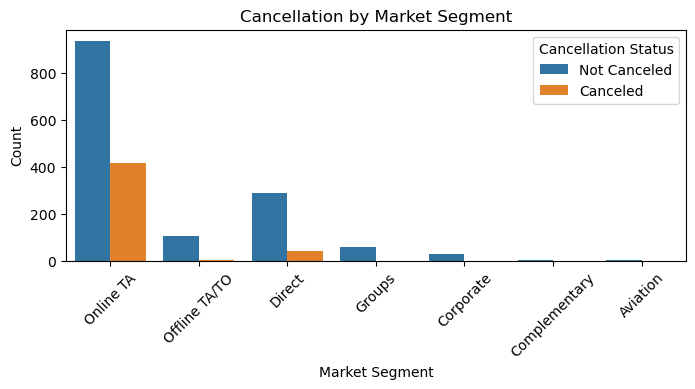

In [48]:
# For categorical columns, use count plots or similar methods
# Example for 'market_segment'
plt.figure(figsize=(8, 3))
sns.countplot(x='market_segment', hue='is_canceled', data=df)
plt.title('Cancellation by Market Segment')
plt.ylabel('Count')
plt.xlabel('Market Segment')
plt.legend(title='Cancellation Status', loc='upper right', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)
plt.show()

is_canceled
0    1400
1     459
Name: count, dtype: int64


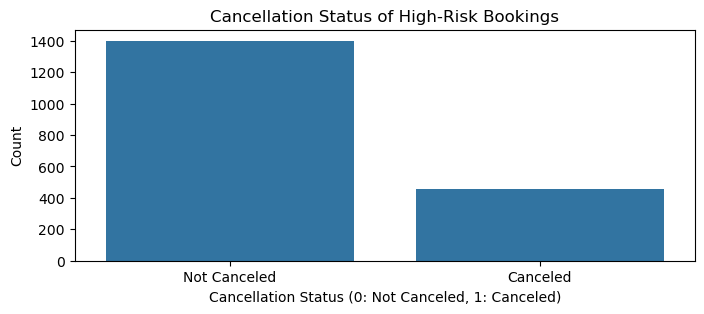

In [52]:
# Define high-risk bookings based on criteria
high_risk_criteria = (df['lead_time'] > 30) | (df['previous_cancellations'] > 0) | (df['is_repeated_guest'] == 0)
high_risk_bookings = df[high_risk_criteria]

# Count high-risk bookings and cancellations
high_risk_count = high_risk_bookings['is_canceled'].value_counts()
print(high_risk_count)

plt.figure(figsize=(8, 3))
sns.countplot(x='is_canceled', data=high_risk_bookings)
plt.title('Cancellation Status of High-Risk Bookings')
plt.ylabel('Count')
plt.xlabel('Cancellation Status (0: Not Canceled, 1: Canceled)')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.show()

# Interpretation Task 3: Booking Cancellation Analysis
Factors Influencing Booking Cancellation:
- Through correlation analysis, you may find that certain numerical variables (like lead_time, previous_cancellations, and stays_in_week_nights) show strong correlations with cancellations. For instance, a higher lead_time might correlate with a higher cancellation rate.
- Monthly and weekly trends in cancellations can indicate how external factors (like economic conditions, holidays, or special events) affect cancellation behavior. For example, if cancellations spike during a particular month, it may reflect a seasonal pattern or external events influencing guest decisions.
- You can define high-risk bookings based on specific criteria, such as high lead_time, previous_cancellations, and whether guests are repeat customers. For example, if a guest has canceled multiple previous bookings, they might be flagged as high-risk.

# Task 4 : Customer Behaioral Segmentation
- Are there distinct patterns in the lead time, special requests, or room preferences for different customer segments?
- Which marketing channels are the most effective for reaching specific customer segments?
- How can marketing strategies be customized to resonate with specific customer segments, considering factors such as previous cancellations, booking lead time, and special requests?


In [42]:
# Grouping by customer type and calculating mean lead time and special requests
lead_time_requests = df.groupby('customer_type').agg({'lead_time': 'mean','total_of_special_requests': 'mean'}).reset_index()
print(lead_time_requests)

     customer_type   lead_time  total_of_special_requests
0         Contract   40.277778                   1.388889
1            Group   61.333333                   0.400000
2        Transient   64.477273                   0.764354
3  Transient-Party  114.429412                   0.700000


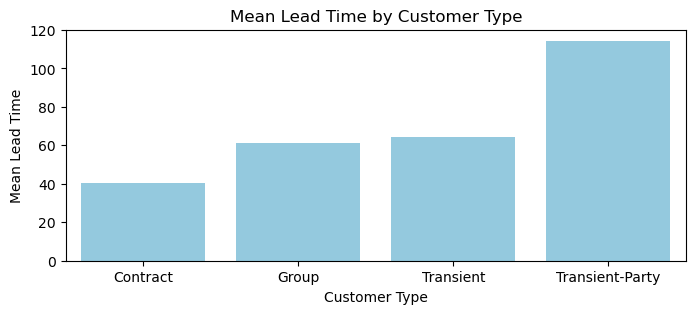

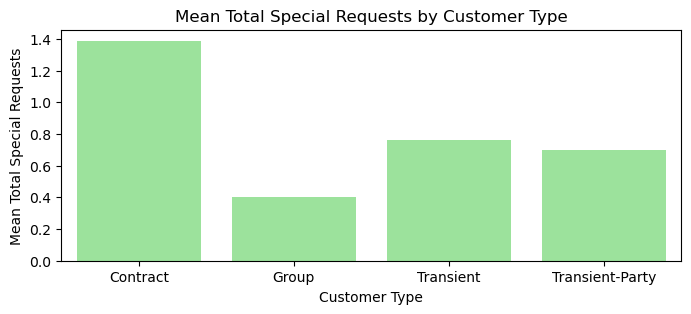

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing Lead Time without palette
plt.figure(figsize=(8, 3))
sns.barplot(x='customer_type', y='lead_time', data=lead_time_requests, color='skyblue')  # Specify a single color
plt.title('Mean Lead Time by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Mean Lead Time')
plt.show()

# Visualizing Total Special Requests without palette
plt.figure(figsize=(8, 3))
sns.barplot(x='customer_type', y='total_of_special_requests', data=lead_time_requests, color='lightgreen')  # Specify a single color
plt.title('Mean Total Special Requests by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Mean Total Special Requests')
plt.show()

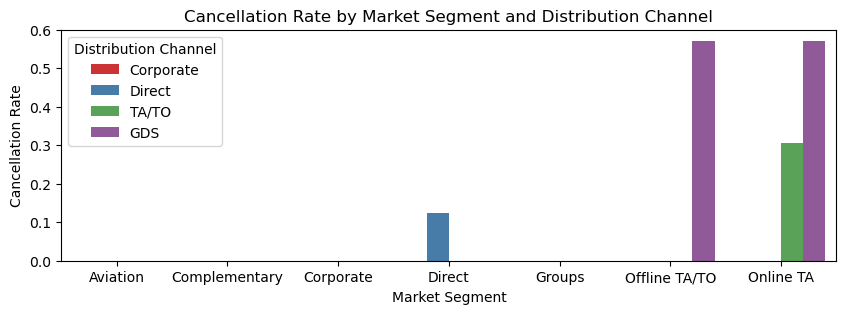

In [51]:
# Grouping by market segment and calculating the cancellation rate
marketing_effectiveness = df.groupby(['market_segment', 'distribution_channel']).agg({'is_canceled': 'mean','lead_time': 'mean'}).reset_index()

plt.figure(figsize=(10, 3))
sns.barplot(x='market_segment', y='is_canceled', hue='distribution_channel', data=marketing_effectiveness, palette='Set1')
plt.title('Cancellation Rate by Market Segment and Distribution Channel')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.legend(title='Distribution Channel')
plt.show()

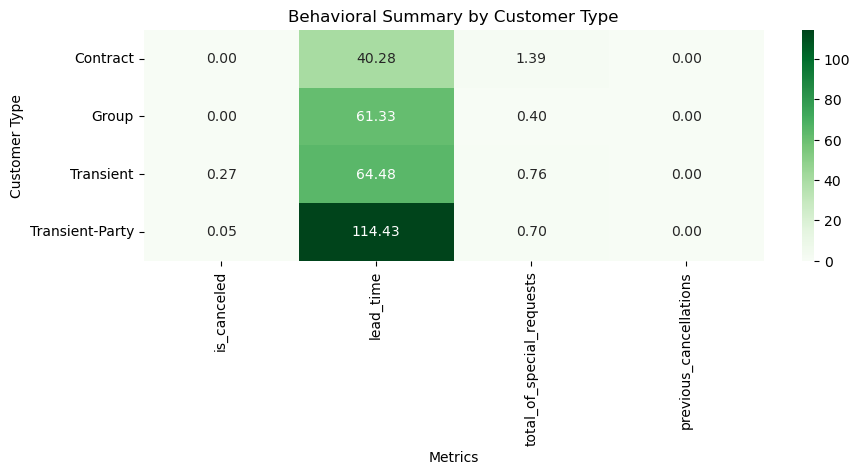

In [54]:
# Create a summary of behavioral characteristics
behavioral_summary = df.groupby('customer_type').agg({
    'is_canceled': 'mean','lead_time': 'mean','total_of_special_requests': 'mean',
    'previous_cancellations': 'mean'}).reset_index()
plt.figure(figsize=(10, 3))
sns.heatmap(behavioral_summary.set_index('customer_type'), annot=True, cmap='Greens', fmt='.2f')
plt.title('Behavioral Summary by Customer Type')
plt.xlabel('Metrics')
plt.ylabel('Customer Type')
plt.show()

# InterpretationTask 4: Customer Behavioral Segmentation 
Customer Behavioral Segmentation focuses on analyzing booking patterns to identify distinct customer segments based on lead time, special requests, and room preferences. It aims to determine the most effective marketing channels for reaching these segments and customize marketing strategies accordingly. By understanding factors like previous cancellations and booking behaviors, the hotel can tailor its offerings to enhance customer satisfaction. Ultimately, this analysis seeks to improve marketing efficiency and drive higher revenue by meeting the specific needs of different customer groups.

# Task 5: Revenue Management
- How does the Average Daily Rate (ADR) vary over time?
- Can we identify pricing strategies that maximize revenue?
- Are there specific room types associated with higher ADR?

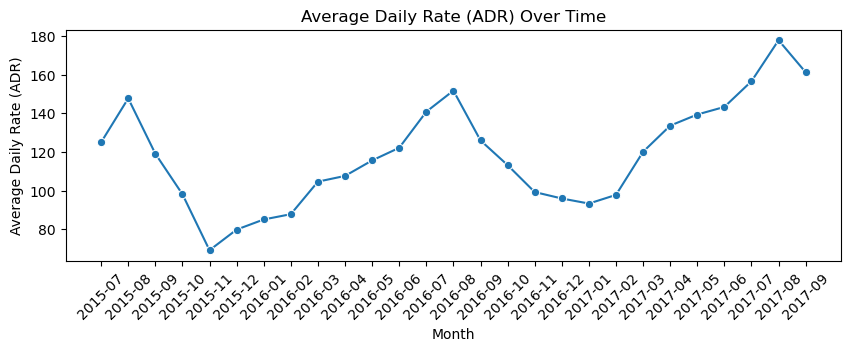

In [62]:
# Convert reservation_status_date to datetime with the correct format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d-%m-%Y')
df['adr'] = pd.to_numeric(df['adr'], errors='coerce')# Convert ADR to numeric and handle any non-numeric entries
df['month'] = df['reservation_status_date'].dt.to_period('M').astype(str) # Create month column

# Group by month to calculate average ADR
monthly_adr = df.groupby('month')['adr'].mean().reset_index()
monthly_adr.dropna(inplace=True)

# Plot ADR over time
plt.figure(figsize=(10, 3))
sns.lineplot(x='month', y='adr', data=monthly_adr, marker='o')
plt.title('Average Daily Rate (ADR) Over Time')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

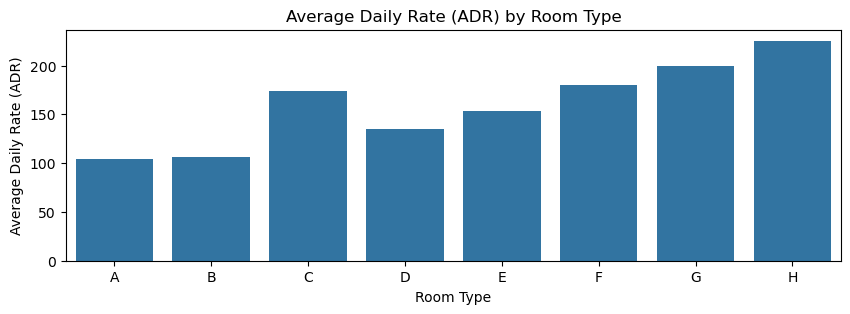

In [72]:
room_adr = df.groupby('reserved_room_type')['adr'].mean().reset_index()

plt.figure(figsize=(10, 3))
sns.barplot(x='reserved_room_type', y='adr', data=room_adr)
plt.title('Average Daily Rate (ADR) by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

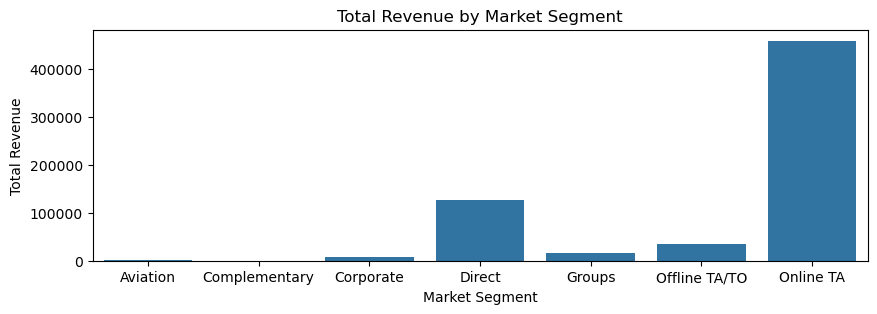

In [70]:
df['total_revenue'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])
pricing_strategy = df.groupby('market_segment')['total_revenue'].sum().reset_index()

plt.figure(figsize=(10, 3))
sns.barplot(x='market_segment', y='total_revenue', data=pricing_strategy)
plt.title('Total Revenue by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Total Revenue')
plt.show()

# Interpretation of Task 5: Revenue Management
This task aims to analyze the Average Daily Rate (ADR) over time, identify effective pricing strategies, and determine which room types yield higher ADR.
- ADR Variation Over Time: By plotting the average ADR per month, we can observe trends, seasonal variations, or patterns in pricing that may influence revenue.
- Identifying Pricing Strategies: Analyzing total revenue by market segment helps to point which segments contribute most to overall revenue, guiding pricing strategies.
- Room Type Analysis: Evaluating ADR by room type allows us to understand which accommodations are more lucrative, aiding in targeted marketing and pricing decisions.

# Task 6: Operational Efficiency
- What is the effectiveness of different booking distribution channels?
- How do booking changes impact hotel operations?
- Is there a correlation between the duration a booking remains on the waiting list and the likelihood of cancellation?

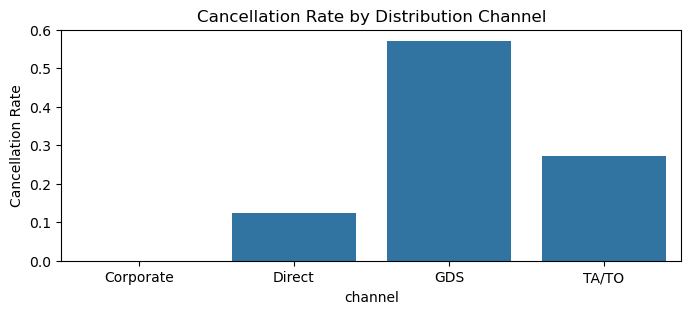

In [76]:
channel_performance = df.groupby('distribution_channel')['is_canceled'].agg(['count', 'mean']).reset_index()
channel_performance.columns = ['channel', 'total_bookings', 'cancellation_rate']

plt.figure(figsize=(8, 3))
sns.barplot(x='channel', y='cancellation_rate', data=channel_performance)
plt.title('Cancellation Rate by Distribution Channel')
plt.ylabel('Cancellation Rate')
plt.show()

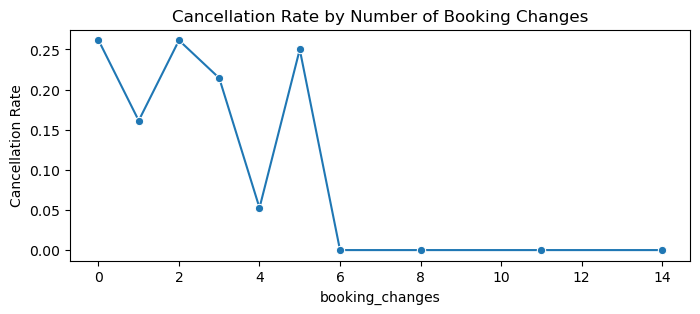

In [80]:
changes_effect = df.groupby('booking_changes')['is_canceled'].mean().reset_index()
plt.figure(figsize=(8, 3))
sns.lineplot(x='booking_changes', y='is_canceled', data=changes_effect, marker='o')
plt.title('Cancellation Rate by Number of Booking Changes')
plt.ylabel('Cancellation Rate')
plt.show()

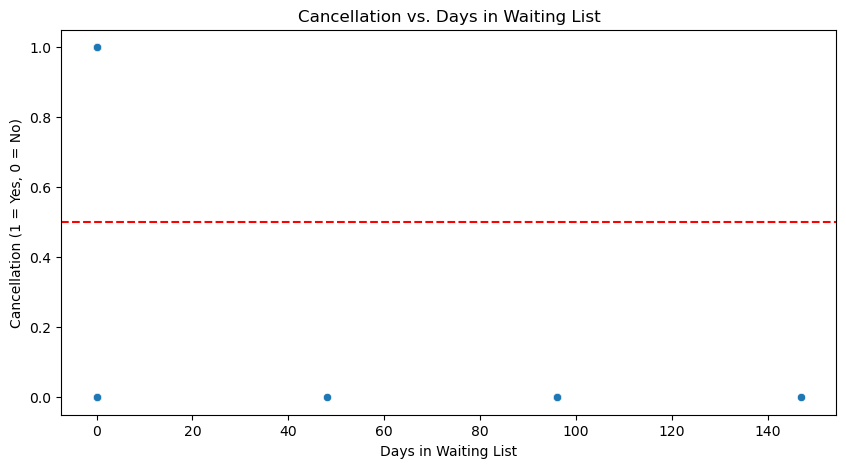

In [81]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='days_in_waiting_list', y='is_canceled', data=df)
plt.title('Cancellation vs. Days in Waiting List')
plt.xlabel('Days in Waiting List')
plt.ylabel('Cancellation (1 = Yes, 0 = No)')
plt.axhline(y=0.5, color='r', linestyle='--')  # Reference line for cancellation
plt.show()

# Interpretation of Task 6: Operational Efficiency
This task focuses on assessing operational efficiency within a hotel context by analyzing various aspects of booking data.

- Effectiveness of Booking Distribution Channels: By evaluating the number of bookings and their associated revenue across different channels (like online travel agencies, direct bookings, etc.), we can identify which channels yield the highest occupancy and revenue, guiding marketing and sales strategies.
- Impact of Booking Changes: Analyzing booking changes (such as modifications or cancellations) helps understand their effects on hotel operations, including resource allocation and revenue management. Frequent changes might indicate customer dissatisfaction or operational inefficiencies.
- Correlation Between Waiting List Duration and Cancellations: Examining the relationship between the length of time a booking remains on the waiting list and the likelihood of cancellation can reveal operational bottlenecks. A strong correlation might suggest that long waiting periods lead to customer frustration, increasing the likelihood of cancellations.

# Task 7: Loyalty Program and Repeat Business
- What is the behavior of repeated guests with respect to their nature of stay?
- How does the success of loyalty program related to the accomodation of special request form customers?
- What factors contribute to repeat business? What is the distribution of lead time for repeated and non-repeated guests?

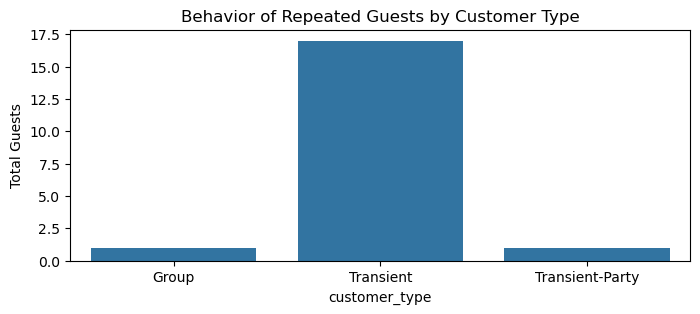

In [88]:
# Grouping by customer_type to analyze repeated guests
repeated_guests_behavior = df[df['is_repeated_guest'] == 1].groupby('customer_type')['lead_time'].agg(['count', 'mean']).reset_index()
repeated_guests_behavior.columns = ['customer_type', 'total_guests', 'average_lead_time']

plt.figure(figsize=(8, 3))
sns.barplot(x='customer_type', y='total_guests', data=repeated_guests_behavior)
plt.title('Behavior of Repeated Guests by Customer Type')
plt.ylabel('Total Guests')
plt.show()

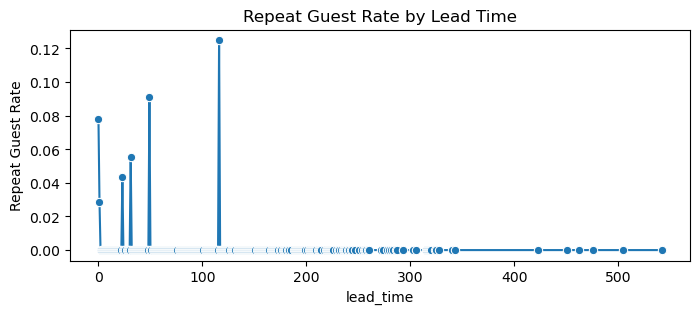

In [89]:
repeat_business = df.groupby('lead_time')['is_repeated_guest'].agg(['mean', 'count']).reset_index()
repeat_business.columns = ['lead_time', 'repeat_guest_rate', 'total_guests']

plt.figure(figsize=(8, 3))
sns.lineplot(x='lead_time', y='repeat_guest_rate', data=repeat_business, marker='o')
plt.title('Repeat Guest Rate by Lead Time')
plt.ylabel('Repeat Guest Rate')
plt.show()

# Interpretation of Task 7: Loyalty Program and Repeat Business
This task focuses on analyzing guest behavior related to loyalty programs and the factors that influence repeat business in a hotel context.
- Behavior of Repeated Guests: Understanding how repeat guests behave concerning the nature of their stay (e.g., business vs. leisure) can provide insights into customer preferences and help tailor services to enhance their experience.
- Success of Loyalty Programs: Investigating how effectively a loyalty program accommodates special requests from customers can indicate its impact on guest satisfaction and retention. A strong correlation may suggest that fulfilling special requests leads to increased loyalty and repeat visits.
- Factors Contributing to Repeat Business: Identifying factors that contribute to repeat business (such as customer satisfaction, previous experiences, and loyalty program benefits) can help refine marketing strategies and improve guest retention efforts.
- Distribution of Lead Time: Analyzing the distribution of lead time (the time between booking and check-in) for repeated versus non-repeated guests can reveal patterns in booking behavior, helping hotels optimize their inventory and marketing strategies.